In [ ]:
import time
from pymongo import MongoClient
import pandas as pd
import json
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [7]:
with open('config.json') as f:
        config_data = json.load(f)
        username = config_data['username']
        password = config_data['password']

client = MongoClient("mongo", 27017, username=username, password=password)

db = client["outputML"]

collection = db["myCollection"]
documents = collection.find()

df = pd.DataFrame(list(documents))
df.head()


,_id,proc_time,event_time,volume_transaction,avg_value_transactions,max_value_transactions,min_value_transactions,prediction
0,649870b13c23587bd81b29fc,2023-06-25T16:51:57.398Z,01.01.2023 00:00:12,6.5,3.0,5.5,1.8,3.0
1,649870bb3c23587bd81b29fe,2023-06-25T16:52:10.410Z,01.01.2023 00:00:13,7.7,3.8,6.7,2.2,3.0
2,649870c93c23587bd81b2a00,2023-06-25T16:52:24.426Z,01.01.2023 00:00:14,7.7,2.6,6.9,2.3,3.0
3,649870d83c23587bd81b2a02,2023-06-25T16:52:39.441Z,01.01.2023 00:00:15,6.0,2.2,5.0,1.5,2.0
4,649870e83c23587bd81b2a04,2023-06-25T16:52:55.459Z,01.01.2023 00:00:16,6.9,3.2,5.7,2.3,3.0


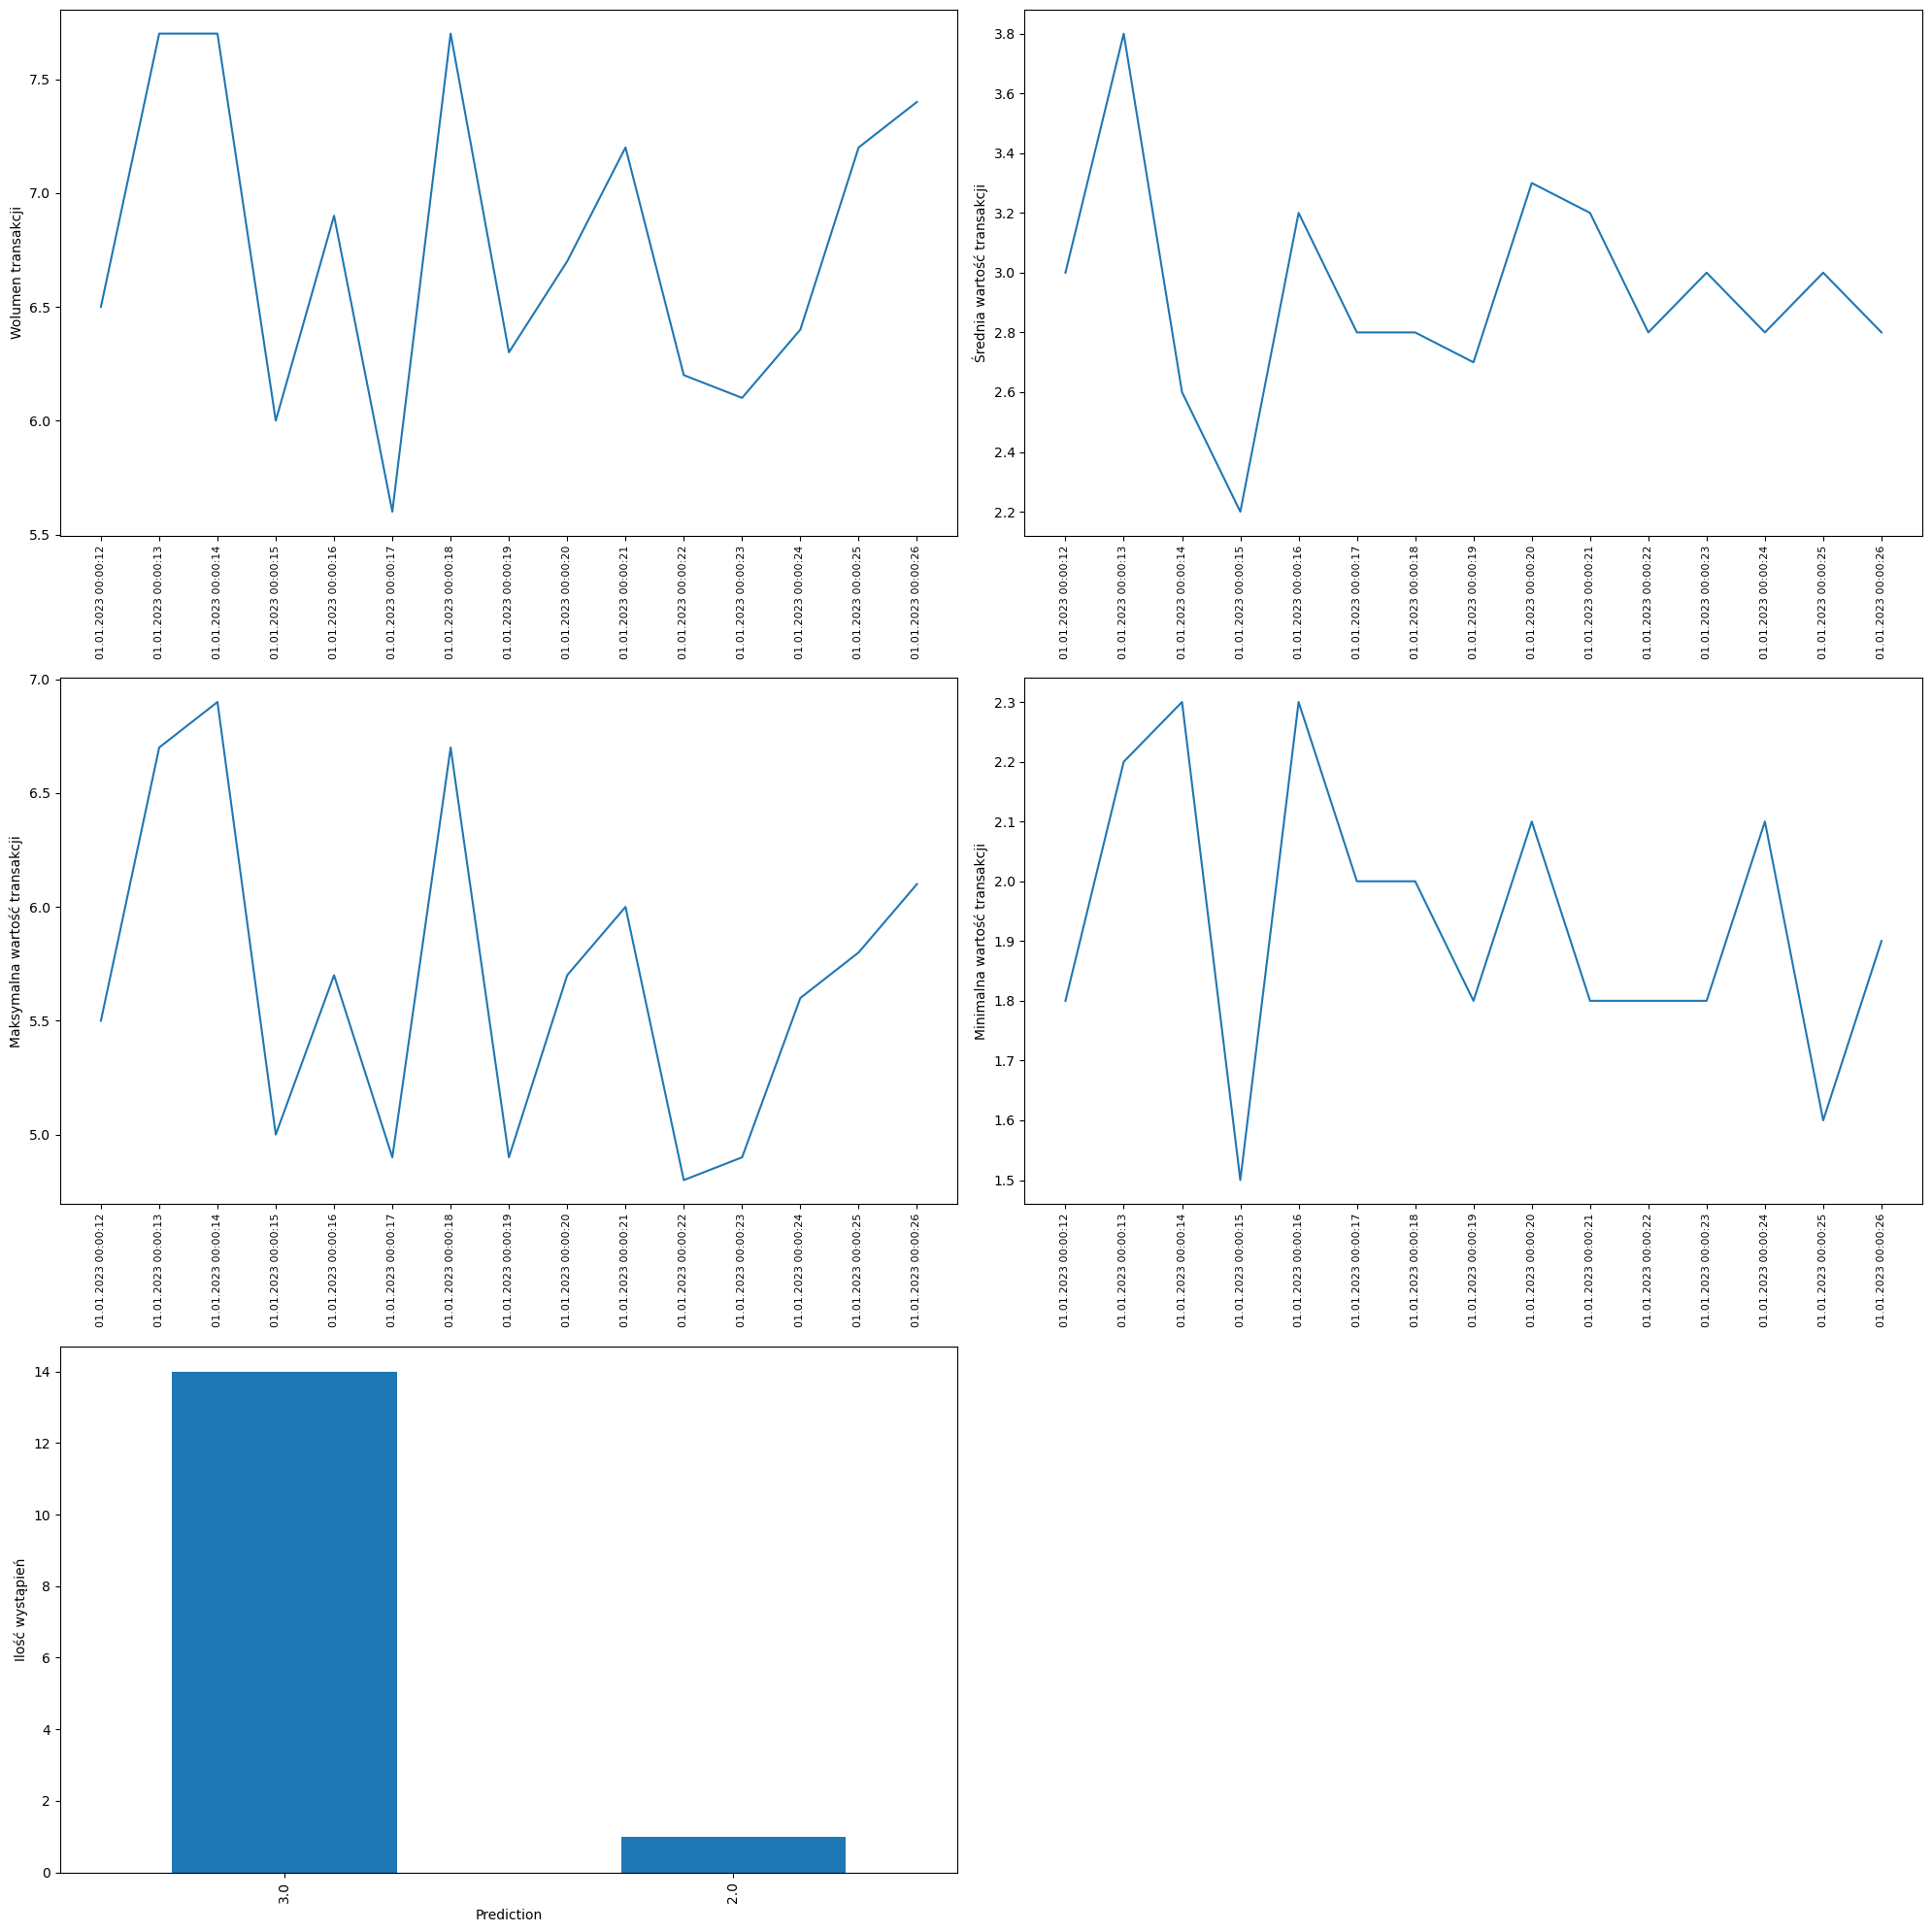

KeyboardInterrupt: 

In [6]:
try:
    while True:
        # Get all documents
        documents = collection.find()

        # Wyświetl wiersze
        df = pd.DataFrame(list(documents))
        clear_output(wait=True)

        # Utwórz wykresy
        plt.figure(figsize=(20, 20))
        plt.subplot(3, 2, 1)
        plt.plot(df['event_time'], df['volume_transaction'])
        plt.ylabel('Wolumen transakcji')
        plt.xticks(fontsize=8, rotation = 90)

        plt.subplot(3, 2, 2)
        plt.plot(df['event_time'], df['avg_value_transactions'])
        plt.ylabel('Średnia wartość transakcji')
        plt.xticks(fontsize=8, rotation = 90)

        plt.subplot(3, 2, 3)
        plt.plot(df['event_time'], df['max_value_transactions'])
        plt.ylabel('Maksymalna wartość transakcji')
        plt.xticks(fontsize=8, rotation = 90)

        plt.subplot(3, 2, 4)
        plt.plot(df['event_time'], df['min_value_transactions'])
        plt.ylabel('Minimalna wartość transakcji')
        plt.xticks(fontsize=8, rotation = 90)

        plt.subplot(3, 2, 5)
        df['prediction'].value_counts().plot(kind='bar')
        plt.ylabel('Ilość wystąpień')
        plt.xlabel('Prediction')
        
        plt.tight_layout()
        plt.show()

        time.sleep(5)
finally:
    client.close()


In [ ]:
# Remove all data
collection.delete_many({})

print('Removed all documents.')

# Close connection
client.close()